Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
train_data_dir = "Skin cancer ISIC The International Skin Imaging Collaboration/Train"
data_dir_train = pathlib.Path(train_data_dir)
test_data_dir = "Skin cancer ISIC The International Skin Imaging Collaboration/Test"
data_dir_test = pathlib.Path(test_data_dir)

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

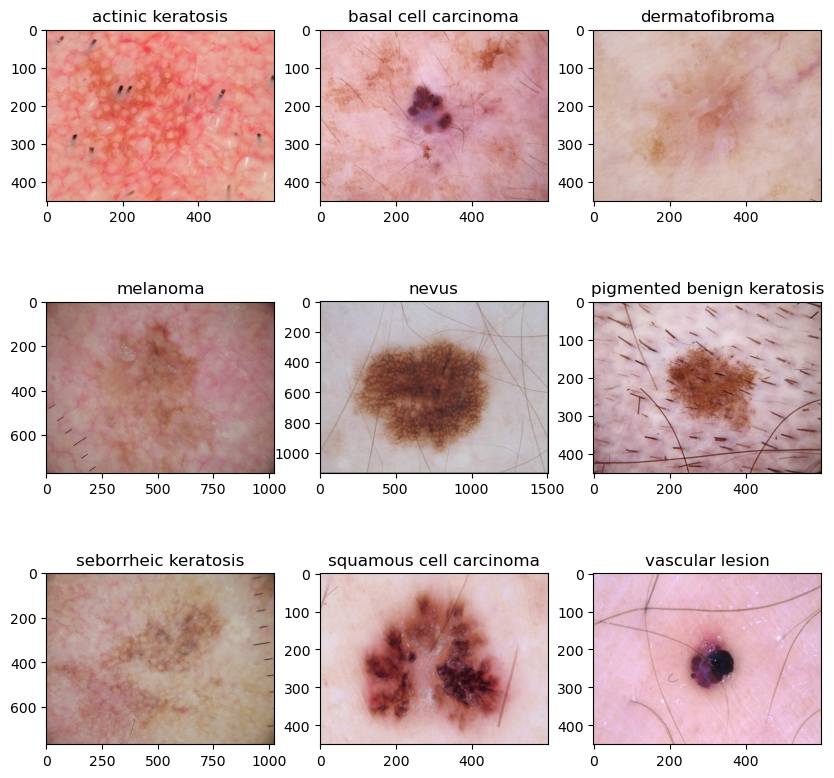

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import Rescaling

num_classes = 9
model = Sequential([
                  Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


/Users/dibyaranjan/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/dibyaranjan/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function
from keras.optimizers import Adam

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 180, 180, 32)   │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 90, 90, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 45, 45, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 22, 22, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 9)              │        69,705 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,129 (1.06 MB)

 Trainable params: 277,129 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/Users/dibyaranjan/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 ━━━━━━━━━━━━━━━━━━━━ 49s 841ms/step - accuracy: 0.1994 - loss: 2.1020 - val_accuracy: 0.1924 - val_loss: 2.0964
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 841ms/step - accuracy: 0.1877 - loss: 2.0752 - val_accuracy: 0.2058 - val_loss: 2.0302
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 842ms/step - accuracy: 0.1996 - loss: 2.0172 - val_accuracy: 0.2707 - val_loss: 1.9439
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 844ms/step - accuracy: 0.2510 - loss: 1.9827 - val_accuracy: 0.3468 - val_loss: 1.9000
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 844ms/step - accuracy: 0.2631 - loss: 1.9360 - val_accuracy: 0.3289 - val_loss: 1.8827
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 846ms/step - accuracy: 0.3124 - loss: 1.8729 - val_accuracy: 0.3065 - val_loss: 1.8386
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 840ms/step - accuracy: 0.3196 - loss: 1.8540 - val_accuracy: 0.3691 - val_loss: 1.7364
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 47s 847ms/step - accuracy: 0.3334 - loss: 1.8044 - val_accuracy: 0.357

### Visualizing training results

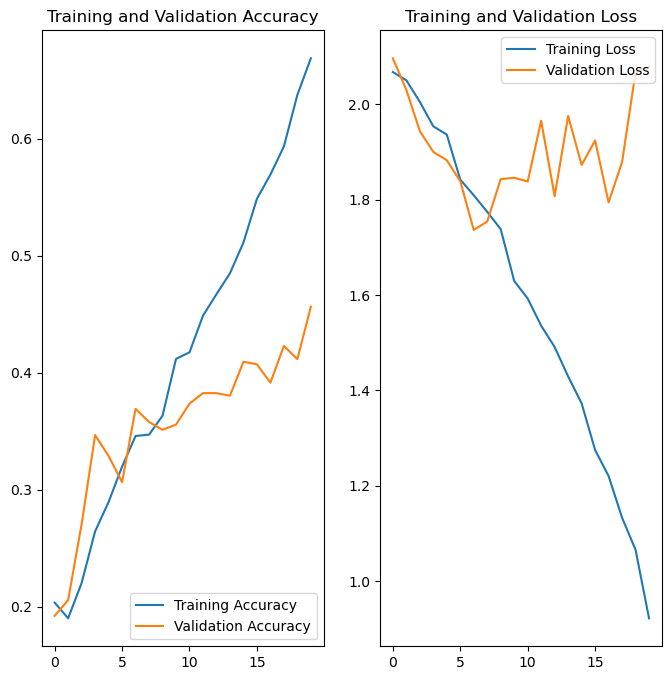

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')

plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

##### High Training Accuracy and Low Validation Accuracy
##### This indicates overfitting—the model is memorizing the training data but isn’t generalizing well to unseen data.
##### We can add regularization technique e.g dropout to reduce model complexity
##### Training loss is decreasing with increase in validation loss , whihc signifies overfitt

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

# There is a overfit from 11 to 14 epoc

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
from tensorflow.keras.layers import RandomFlip
from tensorflow.keras.layers import RandomRotation
from tensorflow.keras.layers import RandomZoom

data_augument = keras.Sequential([
                             RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             RandomRotation(0.2, fill_mode='reflect'),
                             RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

2024-09-21 20:42:27.991024: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


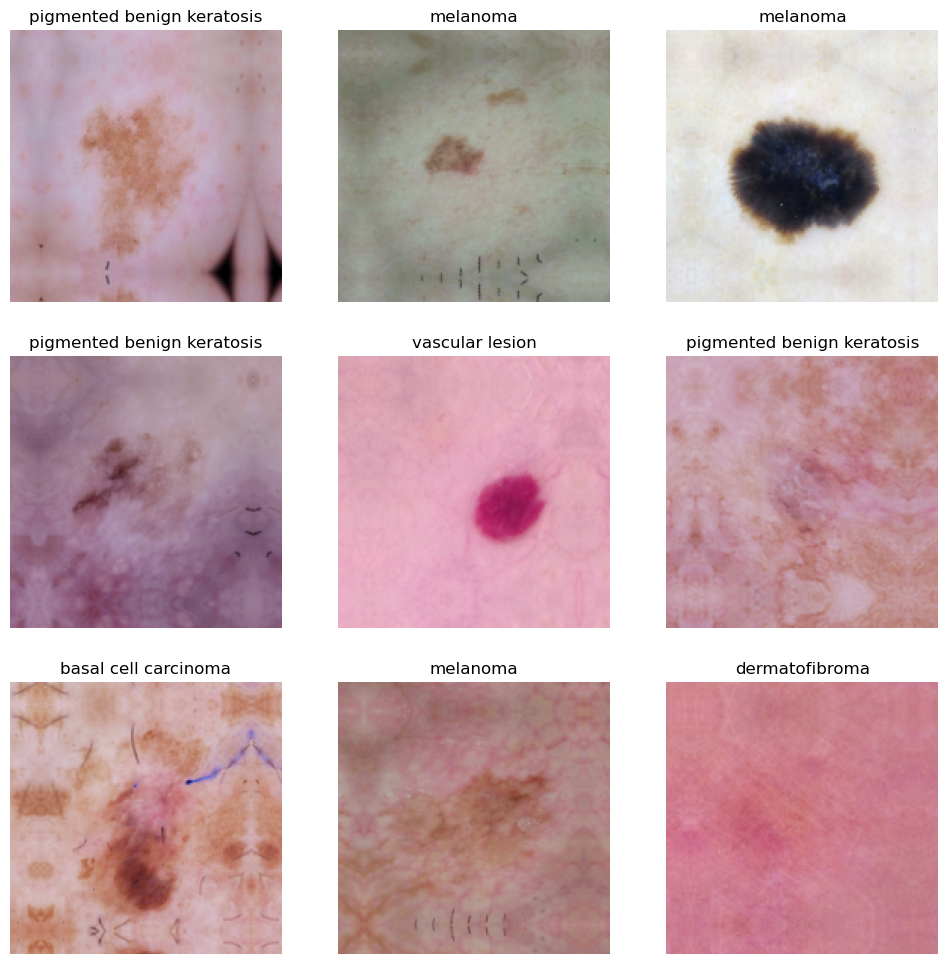

In [18]:
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compiling the model

In [20]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 927ms/step - accuracy: 0.1837 - loss: 2.1752 - val_accuracy: 0.1499 - val_loss: 2.0370
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 929ms/step - accuracy: 0.1978 - loss: 2.0508 - val_accuracy: 0.2170 - val_loss: 2.0290
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 927ms/step - accuracy: 0.2002 - loss: 2.0594 - val_accuracy: 0.1946 - val_loss: 2.0465
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 930ms/step - accuracy: 0.1668 - loss: 2.0671 - val_accuracy: 0.2506 - val_loss: 1.9954
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 926ms/step - accuracy: 0.2379 - loss: 1.9981 - val_accuracy: 0.2371 - val_loss: 2.0045
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 928ms/step - accuracy: 0.2557 - loss: 1.9455 - val_accuracy: 0.3020 - val_loss: 1.9230
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 927ms/step - accuracy: 0.2832 - loss: 1.9431 - val_accuracy: 0.2662 - val_loss: 1.9247
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 926ms/step - accuracy: 0.2623 - loss: 1.9793 - val_accu

### Visualizing the results

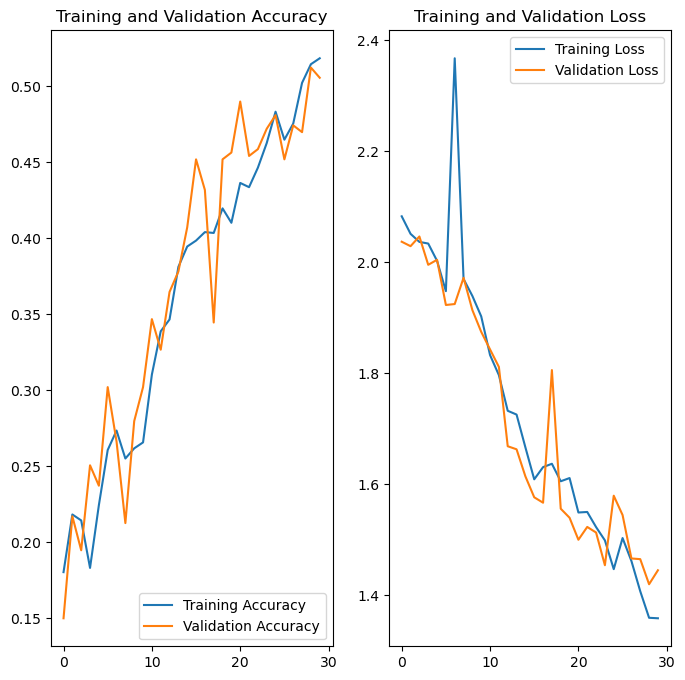

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

##### Overall accuracy got decrease but we can see a balance between training and validation accuracy.There is a decrease in both tarining and validation loss , looks like the model is learning well

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [23]:
## Your code goes here.

path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
1,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
2,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
3,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
4,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2235,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2236,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2237,Skin cancer ISIC The International Skin Imagin...,vascular lesion


In [24]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
1,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
2,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
3,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
4,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2235,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2236,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2237,Skin cancer ISIC The International Skin Imagin...,vascular lesion


<BarContainer object of 9 artists>

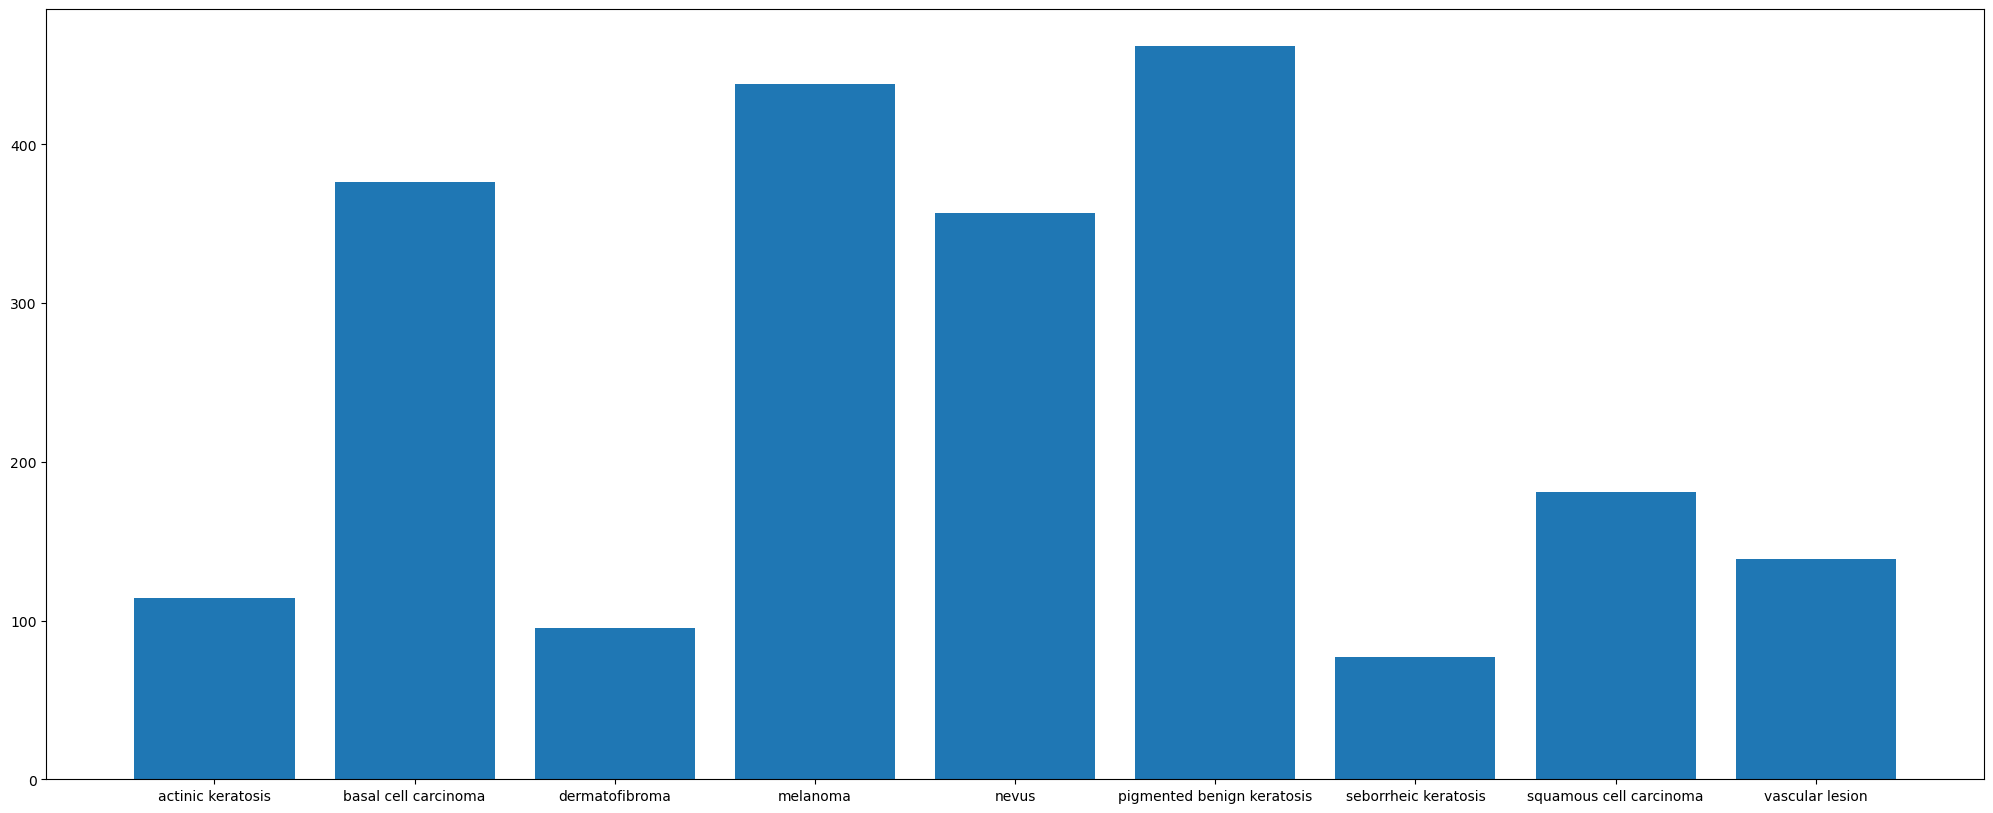

In [25]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
'dermatofibroma' and 'seborrheic keratosis' least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
'pigmented benign keratosis' dominates

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [26]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [27]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset ,save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x28212EBD0>: 100%|██████████| 500/500 [00:03<00:00, 166.34 Samples/s]                    


Initialised with 2239 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2805F8D50>: 100%|██████████| 500/500 [00:02<00:00, 179.44 Samples/s]                    


Initialised with 2239 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x280640410>: 100%|██████████| 500/500 [00:03<00:00, 156.33 Samples/s]                    


Initialised with 2239 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2807298D0>: 100%|██████████| 500/500 [00:02<00:00, 177.07 Samples/s]                    


Initialised with 2239 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2805AEC90>: 100%|██████████| 500/500 [00:02<00:00, 167.78 Samples/s]                    


Initialised with 2239 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2820326D0>: 100%|██████████| 500/500 [00:02<00:00, 202.22 Samples/s]                    


Initialised with 2239 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x28C43B210>: 100%|██████████| 500/500 [00:02<00:00, 182.52 Samples/s]                    


Initialised with 2239 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x281FD4810>: 100%|██████████| 500/500 [00:03<00:00, 158.67 Samples/s]                    


Initialised with 2239 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=2601x1909 at 0x28E31C3D0>: 100%|██████████| 500/500 [00:03<00:00, 159.71 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [28]:
data_dir_train1 = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Train/output')
image_count_train = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train)

4500


In [29]:
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
1,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
2,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
3,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
4,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
...,...,...
6734,Skin cancer ISIC The International Skin Imagin...,vascular lesion
6735,Skin cancer ISIC The International Skin Imagin...,vascular lesion
6736,Skin cancer ISIC The International Skin Imagin...,vascular lesion
6737,Skin cancer ISIC The International Skin Imagin...,vascular lesion


### Lets see the distribution of augmented data after adding new images to the original training data.

In [30]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train1, '*', '*.jpg'))]
path_list

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/output/melanoma/melanoma_original_ISIC_0010056.jpg_bb0dbdf0-3c42-43e8-8f38-6675bbe2ea70.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/output/melanoma/melanoma_original_ISIC_0009971.jpg_a80fd258-2d61-4e06-a43c-351f49a6efff.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/output/melanoma/melanoma_original_ISIC_0010663.jpg_8efea2a1-e4bb-41fc-b0ef-8b65d4bae007.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/output/melanoma/melanoma_original_ISIC_0010148.jpg_6904561c-5514-4797-936c-3c9f9b4977db.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/output/melanoma/melanoma_original_ISIC_0010034.jpg_4d059400-3e6f-4ab2-b2c5-94cec2df07a6.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/output/melanoma/melanoma_original_ISIC_0010174.jpg_2451283e-bef5-4aa0-bbf8-91b225b2725a.jpg',
 'Skin cancer IS

In [31]:
data_dir_train1

PosixPath('Skin cancer ISIC The International Skin Imaging Collaboration/Train/output')

In [32]:
list_new = glob(os.path.join(data_dir_train1,'*', '*.jpg'))
##'Skin cancer ISIC The International Skin Imaging Collaboration/Train/output/melanoma/melanoma_original_ISIC_0010629.jpg_414190ee-ed9a-476b-9c98-84343999ff73.jpg'

In [33]:
lesion_list_new = [os.path.basename(os.path.dirname(x)) for x in glob(os.path.join(data_dir_train1,'*', '*.jpg'))]
len(lesion_list_new)

4500

In [34]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [36]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df,df2])

In [37]:
new_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
1,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
2,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
3,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
4,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
...,...,...
4495,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
4496,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
4497,Skin cancer ISIC The International Skin Imagin...,dermatofibroma
4498,Skin cancer ISIC The International Skin Imagin...,dermatofibroma


In [38]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    1418
melanoma                      1313
basal cell carcinoma          1145
nevus                         1061
squamous cell carcinoma        485
vascular lesion                438
actinic keratosis              340
dermatofibroma                 301
seborrheic keratosis           238
Name: count, dtype: int64

In [39]:
original_df['Label'].value_counts()

Label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [40]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [41]:
data_dir_train='Skin cancer ISIC The International Skin Imaging Collaboration/Train'
## "path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [42]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 10 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [43]:
## your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 10
model = Sequential([ 
                    Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

/Users/dibyaranjan/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/dibyaranjan/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [44]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [45]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/Users/dibyaranjan/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 ━━━━━━━━━━━━━━━━━━━━ 160s 947ms/step - accuracy: 0.6479 - loss: 1.4052 - val_accuracy: 0.6726 - val_loss: 1.3161
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 159s 940ms/step - accuracy: 0.6630 - loss: 1.3130 - val_accuracy: 0.6719 - val_loss: 1.3329
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 159s 938ms/step - accuracy: 0.6636 - loss: 1.3117 - val_accuracy: 0.6719 - val_loss: 1.3220
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 162s 958ms/step - accuracy: 0.6650 - loss: 1.3087 - val_accuracy: 0.6704 - val_loss: 1.2862
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 159s 941ms/step - accuracy: 0.6629 - loss: 1.2713 - val_accuracy: 0.6689 - val_loss: 1.3023
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 159s 941ms/step - accuracy: 0.6663 - loss: 1.2397 - val_accuracy: 0.6704 - val_loss: 1.2734
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 159s 942ms/step - accuracy: 0.6652 - loss: 1.2480 - val_accuracy: 0.6726 - val_loss: 1.2814
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 159s 941ms/step - accuracy: 0.6604 - loss: 1.23

#### **Todo:**  Visualize the model results

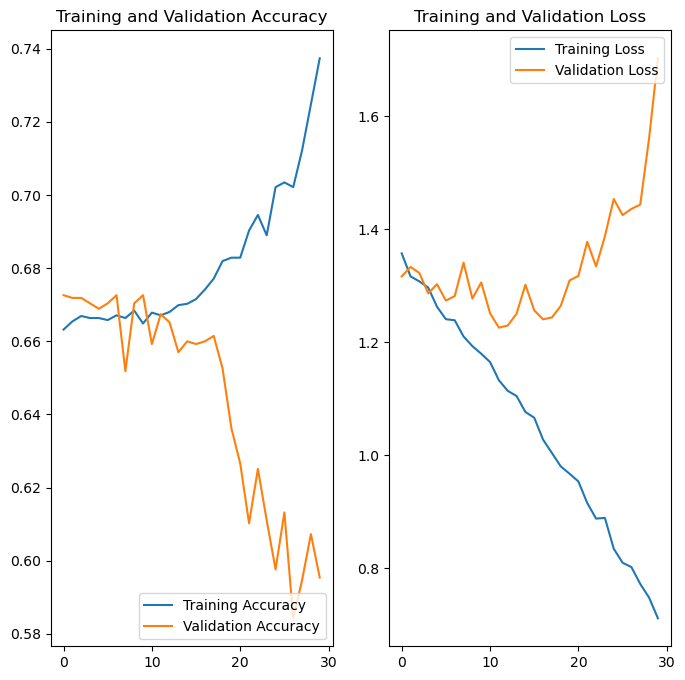

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### class rebalanc increases the accuracy but we can see the model became overfitt due to significant decraease in training loss and increase in validation loss